<a href="https://colab.research.google.com/github/peterphoenix/School-Projects/blob/master/Final_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Peter Phoenix - 2201735413

Machine Learning - LA01

#1. Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [ ]:
data = np.array (
    [[1, 2, -1], 
    [-1, 3, -2]]
    )
data = data.astype("float64")

weight = np.array (
    [[1, 1, -1], 
    [2, 1, 1],
    [-1, 2, -3], 
    [1, 2, 3],
    [1, 1, 3]]
    )
weight = weight.astype("float64")


l_rate = 0.5
rad = 1.0
decay = 1.0
n = 1000

A. Implementasi SOM 1 dimensi

In [ ]:
# Berikut adalah fungsi untuk mencari Best Matching Unit, yaitu unit dengan euclidean distance terkecil
# minDist di set menjadi nilai sebesar mungkin, kemudian jika distrance yang didapatkan lebih kecil daripada minDist, maka nilai idx dan minDist akan diupdate
# Euclidean distance dihitung dengan memanfaatkan fungsi pada library scipy
def BMU (dat):
  idx = -1
  minDist = np.iinfo(np.int).max
  for i in range (weight.shape[0]):
    dist = distance.euclidean(dat, weight[i])
    if minDist > dist:
      minDist = dist
      idx = i
  return idx

# Berikut adalah fungsi untuk menghitung decaying radius, dimana rumusnya adalah nilai decaying radius awal dikali dengan nilai exponent dari negatif dari nomor iterasi dibagi dengan maximum iterasi
def decay_rad(decay, i, maxIter):
  return decay * np.exp(-i/maxIter)

In [ ]:
for i in range (n) :
  # Pilih data secara random
  dat = data[np.random.randint(0, data.shape[0])]
  idx = BMU(dat)
  
  # Update
  # Akan dilakukan update pada weight yang memiliki selisih indeks kurang dari sama dengan radius
  for j in range (weight.shape[0]) :
    if (abs(j-idx) <= rad) :
      # Berikut rumus untuk mengupdate weight yang ada
      neighbor_stregth = np.exp(-((j-idx)*(j-idx)) / decay_rad(decay, j, n))
      weight[j] = weight[j] + (neighbor_stregth * l_rate * (dat - weight[j]))
 
print("Final Weight:")
print(weight)

Final Weight:
[[ 1.          2.         -1.        ]
 [-0.04344943  2.52172472 -1.52172472]
 [-1.          3.         -2.        ]
 [-1.          3.         -2.        ]
 [ 1.          1.          3.        ]]


B. Visualisasi dari SOM dengan warna RGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 1.          2.         -1.        ]
  [-0.04344943  2.52172472 -1.52172472]
  [-1.          3.         -2.        ]
  [-1.          3.         -2.        ]
  [ 1.          1.          3.        ]]]


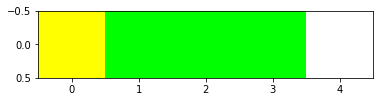

In [ ]:
# Array diubah menjadi 3 dimensi agar value yang terdapat dalam array melambangkan RGB
img = np.array([weight])
plt.imshow(img)
plt.show()

Setelah dilakukan normalisasi

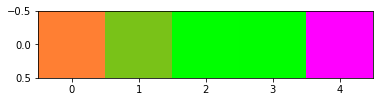

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(weight)

normalized = scaler.transform(weight)

img = np.array([normalized])
plt.imshow(img)
plt.show()

#2. Dimension Reduction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
D1 = {"sepal_length": [5.1, 4.9, 4.7, 4.6, 5, 5.4, 4.6, 5, 4.4, 4.9], "sepal_width": [3.5, 3, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1], 
      "petal_length": [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5], "petal_width": [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1]}
data1 = pd.DataFrame(D1)

D2 = {"sepal_length": [7, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2], "sepal_width": [3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7], 
      "petal_length": [4.7, 4.5, 4.9, 4, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9], "petal_width": [1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1, 1.3, 1.4]}
data2 = pd.DataFrame(D2)

D3 = {"sepal_length": [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2], "sepal_width": [3.3, 2.7, 3, 2.9, 3, 3, 2.5, 2.9, 2.5, 3.6], 
      "petal_length": [6, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1], "petal_width": [2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5]}
data3 = pd.DataFrame(D3)

print(data1)
print(data2)
print(data3)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1
   sepal_length  sepal_width  petal_length  petal_width
0           7.0          3.2           4.7          1.4
1           6.4          3.2           4.5          1.5
2           6.9          3.1           4.9          1.5
3           5.5          2.3           4.0          1.3
4           6.5          2.8           4.6          1.5
5           5.7          2.8           4.5      

Sebelum dilakukannya perhitungan covariance matrix, eigen value, eigen vector, dan PCA data tersebut perlu digabungkan agar nilai yang didapatkan berdasarkan setiap kelas yang ada tidak hanya pada satu kelas tertentu saja. Jika dilakukan secara terpisah, maka tidak akan terlihat clusternya.

In [ ]:
# Penambahan kolom class pada setiap data untuk memberi label dari tabel mana data tersebut berasal
data1.insert(4, 'Class', 'data 1')
data2.insert(4, 'Class', 'data 2')
data3.insert(4, 'Class', 'data 3')

# Penggabungan data
# ignore_index = True digunakan hanya agar index terurut kembali, jika tidak digunakan maka index yang terprint adalah 0-9 0-9 0-9 (sesuai dengan index awal)
data = pd.concat([data1, data2, data3], ignore_index=True)
print(data)

    sepal_length  sepal_width  petal_length  petal_width   Class
0            5.1          3.5           1.4          0.2  data 1
1            4.9          3.0           1.4          0.2  data 1
2            4.7          3.2           1.3          0.2  data 1
3            4.6          3.1           1.5          0.2  data 1
4            5.0          3.6           1.4          0.2  data 1
5            5.4          3.9           1.7          0.4  data 1
6            4.6          3.4           1.4          0.3  data 1
7            5.0          3.4           1.5          0.2  data 1
8            4.4          2.9           1.4          0.2  data 1
9            4.9          3.1           1.5          0.1  data 1
10           7.0          3.2           4.7          1.4  data 2
11           6.4          3.2           4.5          1.5  data 2
12           6.9          3.1           4.9          1.5  data 2
13           5.5          2.3           4.0          1.3  data 2
14           6.5         

Sebelum dilakukannya perhitungan, data juga perlu dipisahkan input serta outputnya (class)

In [ ]:
inp = data.iloc[:, [0, 1, 2, 3]]
print(inp)

out = data.iloc[:, [4]]
print(out)

    sepal_length  sepal_width  petal_length  petal_width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
5            5.4          3.9           1.7          0.4
6            4.6          3.4           1.4          0.3
7            5.0          3.4           1.5          0.2
8            4.4          2.9           1.4          0.2
9            4.9          3.1           1.5          0.1
10           7.0          3.2           4.7          1.4
11           6.4          3.2           4.5          1.5
12           6.9          3.1           4.9          1.5
13           5.5          2.3           4.0          1.3
14           6.5          2.8           4.6          1.5
15           5.7          2.8           4.5          1.3
16           6.3          3.3  

A. Covariance matrix

In [ ]:
cov = inp.cov()

print("Covariance matrix data\n")
print(cov)

Covariance matrix data

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.929437    -0.006621      1.589920     0.613195
sepal_width      -0.006621     0.139034     -0.237448    -0.085034
petal_length      1.589920    -0.237448      3.539644     1.446713
petal_width       0.613195    -0.085034      1.446713     0.622575


A. Eigen Value dan Eigen Vector

In [ ]:
eig_val, eig_vec = np.linalg.eig(cov)

print("Eigen Value:")
print (eig_val)
print("\nEigen Vector:")
print (eig_vec)

Eigen Value:
[4.88325892 0.26187349 0.07725825 0.00829899]

Eigen Vector:
[[ 0.39532578 -0.76391507 -0.40461393  0.31054608]
 [-0.04926785 -0.56346221  0.74617672 -0.35114573]
 [ 0.84934414  0.23996295  0.01616932 -0.4698626 ]
 [ 0.34627263  0.20337622  0.52843773  0.7479886 ]]


B. Reduce into 2 dimensions using PCA

Sebelum dilakukannya PCA, data di normalisasi terlebih dahulu agar seluruh data memiliki nilai yang serupa. Hal ini diperlukan agar PCA yang dihasilkan lebih merata, karena jika tidak dilakukan normalisasi maka data dengan nilai yang lebih besar akan berpengaruh jauh lebih banyak dibandingkan dengan data dengan nilai yang kecil.

In [ ]:
norm = StandardScaler().fit_transform(inp)

pca = PCA(n_components = 2)
pca = pca.fit(norm)
pca_out = pca.transform(norm)

print("Output after PCA:")
print(pca_out)

Output after PCA:
[[-2.20548647  0.89036835]
 [-2.04114319 -0.46349245]
 [-2.2956321  -0.0224054 ]
 [-2.23256684 -0.31509423]
 [-2.31677919  1.11082379]
 [-2.01501033  2.02842316]
 [-2.35638875  0.45685881]
 [-2.17432466  0.5978557 ]
 [-2.26595362 -0.89959099]
 [-2.13842341 -0.20986167]
 [ 0.96437887  0.82930424]
 [ 0.63837693  0.61660249]
 [ 1.10135228  0.5392044 ]
 [ 0.32436837 -2.01872282]
 [ 0.94739971 -0.37321699]
 [ 0.31954242 -0.66574292]
 [ 0.66479928  0.83929456]
 [-0.51205901 -1.98450368]
 [ 0.80032508 -0.0860585 ]
 [-0.02278065 -1.09819538]
 [ 1.74471764  0.86030515]
 [ 1.06570481 -0.87172149]
 [ 2.03114572  0.36846162]
 [ 1.32084888 -0.1826969 ]
 [ 1.73704725  0.1555837 ]
 [ 2.53455593  0.54693093]
 [ 0.33286406 -1.71209894]
 [ 2.10434505  0.17547499]
 [ 1.8298267  -1.06487101]
 [ 2.11494924  1.95278148]]


C. Plot the PCA

Sebelum dilakukan plot, setiap data perlu digabungkan kembali dengan class mereka diawal.

In [ ]:
DF_inp = pd.DataFrame(data = pca_out, columns = ['principal component 1', 'principal component 2'])
DF_out = pd.DataFrame(data = out, columns = ['Class'])
finalDF = pd.concat([DF_inp, DF_out], axis = 1)
print(finalDF)

    principal component 1  principal component 2   Class
0               -2.205486               0.890368  data 1
1               -2.041143              -0.463492  data 1
2               -2.295632              -0.022405  data 1
3               -2.232567              -0.315094  data 1
4               -2.316779               1.110824  data 1
5               -2.015010               2.028423  data 1
6               -2.356389               0.456859  data 1
7               -2.174325               0.597856  data 1
8               -2.265954              -0.899591  data 1
9               -2.138423              -0.209862  data 1
10               0.964379               0.829304  data 2
11               0.638377               0.616602  data 2
12               1.101352               0.539204  data 2
13               0.324368              -2.018723  data 2
14               0.947400              -0.373217  data 2
15               0.319542              -0.665743  data 2
16               0.664799      

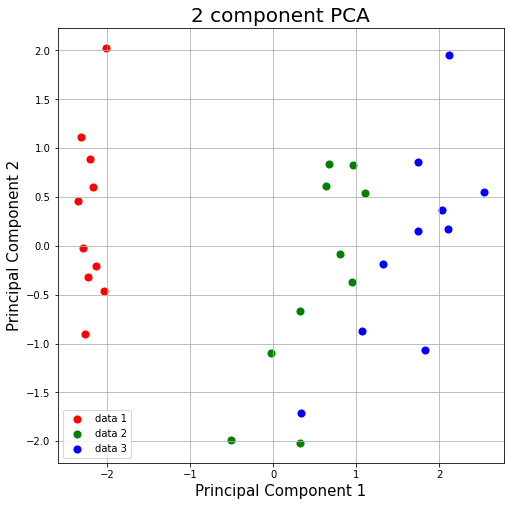

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['data 1', 'data 2', 'data 3']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Class'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Pada diagram cartesius diatas dapat dilihat persebaran data yang ada dimana sumbu X dan Y berasal dari nilai hasil PCA yang telah me-reduce data menjadi 2 dimensi. Penjelasan persebaran data adalah sebagai berikut:


*   Data yang berasal dari tabel Data I ditandai dengan warna merah
*   Data yang berasal dari tabel Data II ditandai dengan warna hijau
*   Data yang berasal dari tabel Data III ditandai dengan warna biru

Pada data 1 dapat terlihat dengan jelas karena terpisah dari data yang lain, namun posisi data 2 dan data 3 sangat dekat jadi lebih sulit untuk dibedakan.

#3. Convolution

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
data = np.array([
                 [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
                 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                 [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
                 [1, 0, 1, 0, 0, 0, 0, 1, 1, 1],
                 [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
                 [1, 0, 1, 0, 0, 0, 0, 1, 1, 1],
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
])

kernel1 = np.array([
                    [0, 0.25, 0],
                    [0.25, 0.25, 0.25],
                    [0, 0.25, 0]
])

kernel2 = np.array([
                    [1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]                  
])

kernel = np.stack((kernel1, kernel2), axis = 0)

print("Data:")
print(data)

print("\n Kernel:")
print(kernel)

Data:
[[1 0 1 1 1 1 1 1 0 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 1 1 1]
 [1 0 1 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 0 1 1 1]
 [1 0 1 0 0 0 0 1 1 1]
 [1 1 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]]

 Kernel:
[[[ 0.    0.25  0.  ]
  [ 0.25  0.25  0.25]
  [ 0.    0.25  0.  ]]

 [[ 1.    0.   -1.  ]
  [ 1.    0.   -1.  ]
  [ 1.    0.   -1.  ]]]


A. Convolution calculation

I. Berikut kode untuk menerapkan Convolution tanpa border padding

In [ ]:
# Filter yang dimaksud disini adalah kernel
def conv(img, conv_filter):

    # If dibawah ini hanya untuk mengecek apakah input yang diberikan memiliki dimensi yang sesuai, jika tidak maka kode akan dihentikan.
    if len(img.shape) != len(conv_filter.shape) - 1: # Cek apakah jumlah dimensi sama.
        print("Error: Number of dimensions in conv filter and image do not match.")  
        exit()
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Cek apakah jumlah channel gambar sesuai dengan jumlah channel kernel.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: Number of channels in both image and filter must match.")
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]: # Cek apakah dimensi kernel sama.
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        sys.exit()
    if conv_filter.shape[1]%2==0: # Cek apakah dimensi kernel ganjil.
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        sys.exit()

    # Feature map kosong untuk menampung output dari hasil convolution setiap kernel.
    feature_maps = np.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Melakukan convolution dengan setiap kernel yang ada.
    for filter_num in range(conv_filter.shape[0]):
        print("Filter ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :]

        # If dibawah ini untuk mengecek apakah terdapat lebih dari 1 channel untuk kernel
        # Jika ada (dimana pada soal ini terdapat 2 channel), maka setiap channel akan melakukan convolution
        # Hasil dari setiap convolution akan dijumlahkan menjadi sebuah feature map 
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array yang menyimpan jumlah dari seluruh feature map.
            for ch_num in range(1, curr_filter.shape[-1]): # Proses convolution pada setiap channel dan menjumlahkan hasilnya.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else:
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map
    return feature_maps

# Implementasi dari fungsi convolution
def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = np.zeros((img.shape))

    for r in np.uint16(np.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in np.uint16(np.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):

            curr_region = img[r-np.uint16(np.floor(filter_size/2.0)):r+np.uint16(np.ceil(filter_size/2.0)), 
                              c-np.uint16(np.floor(filter_size/2.0)):c+np.uint16(np.ceil(filter_size/2.0))]

            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)
            result[r, c] = conv_sum 
            
    final_result = result[np.uint16(filter_size/2.0):result.shape[0]-np.uint16(filter_size/2.0), 
                          np.uint16(filter_size/2.0):result.shape[1]-np.uint16(filter_size/2.0)]
    return final_result

In [ ]:
feature_map = conv(data, kernel)

Filter  1
Filter  2


II. Berikut kode untuk menerapkan ReLU

Cara kerjanya adalah dengan melakukan looping pada setiap element pada feature map dan mengembalikan nilai asli jika nilai pada sel tersebut lebih dari 0, dan jika nilai kurang dari 0 maka nilai yang dikembalikan adalah 0.

In [ ]:
def relu(feature_map):
    relu_out = np.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in np.arange(0,feature_map.shape[0]):
            for c in np.arange(0, feature_map.shape[1]):
                relu_out[r, c, map_num] = np.max([feature_map[r, c, map_num], 0])
    return relu_out

In [ ]:
feature_map_relu = relu(feature_map)

III. Berikut kode untuk menerapkan Max pooling layer 2x2

Cara kerja dari pooling layer ini adalah dengan mengambil nilai max pada setiap kotak berukuran 2x2 (size = 2) kemudian berpindah sebanyak 2 kotak (stride = 2).

In [ ]:
def pooling(feature_map, size=2, stride=2):
    # Array kosong untuk menampung output dengan ukuran yang disesuaikan
    pool_out = np.zeros((np.uint16((feature_map.shape[0]-size)/stride)+1,
                            np.uint16((feature_map.shape[1]-size)/stride)+1,
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in np.arange(0,feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in np.arange(0, feature_map.shape[1]-size+1, stride):
                pool_out[r2, c2, map_num] = np.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out

In [ ]:
feature_map_relu_pool = pooling(feature_map_relu, 2, 2)

Dikarenakan soal tidak meminta adanya convolution layer lain untuk distack, maka proses perhitungan berhenti disini. Namun, jika diperlukan adanya convolution layer lain untuk distack, maka dapat memanggil ulang fungsi conv, relu dan pooling.

B. Convert numpy array to images and show

Code untuk menampilkan gambar seharusnya im.show() namun colab tidak menampilkan gambar saat fungsi tersebut dipanggil.

Untuk menangani hal ini, dapat langsung dipanggil im saja dan colab akan otomatis menampilkan gambar.

In [ ]:
im1 = Image.fromarray((feature_map_relu_pool[:,:,0] * 255).astype(np.uint8))
im1

im2 = Image.fromarray((feature_map_relu_pool[:,:,1] * 255).astype(np.uint8))
im2



Gambar juga dapat dilihat value per pixelnya, berikut contoh dengan menggunakan library matplotlib

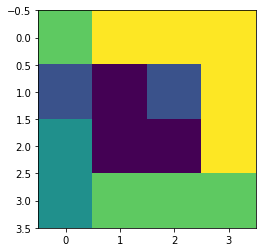

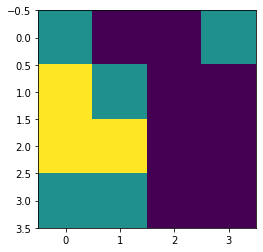

2


In [ ]:
import matplotlib.pyplot as plt
pix1 = np.array((feature_map_relu_pool[:,:,0] * 255))
plt.imshow(pix1)
plt.show()

pix2 = np.array((feature_map_relu_pool[:,:,1] * 255))
plt.imshow(pix2)
plt.show()

print(feature_map.shape[-1])

Gambar tersebut juga dapat di save dengan kode berikut

Karena format gambar adalah RGBA atau Red, Green Blue, Alpha dan format .jpg tidak dapat mensupport Alpha (transparansi), maka perlu diconvert menjadi RGB untuk disave dalam bentuk .jpg atau dapat menggunkan .png

In [ ]:
rgb_im1 = im1.convert('RGB')
rgb_im1.save('test1.jpg')

im1.save('test1.png')

rgb_im2 = im2.convert('RGB')
rgb_im2.save('test2.jpg')

im2.save('test2.png')

#4. CNN

**I. [2%] Why LeNet-5 is said consist of 5-layer networks? Please explain it!**

![alt text](https://drive.google.com/uc?export=view&id=1QSh4L9m0fxouVAPLb2F59-LUd2jgiBaX)

Figure 4.1 LeNet-5 Architecture
(Source: powerpoint Binus)

Jika dilihat sekilas, LeNet-5 memiliki 7 buah layer, yaitu :
1.   C1 Convolutional Layer
2.   S2 Pooling Layer
3.   C3 Convolutional Layer
4.   S4 Pooling Layer
5.   C5 Fully Connected Convolutional Layer
6.   FC6 Fully Connected Layer
7.   Output Layer 

Namun layer nomor 5, 6, dan 7 bersifat fully connected jadi dapat dianggap sebagai sebuah layer saja, oleh karena itu kenapa LeNet-5 disebut terdiri dari 5 buah layer, yaitu:
1.   C1 Convolutional Layer
2.   S2 Pooling Layer
3.   C3 Convolutional Layer
4.   S4 Pooling Layer
5.   Gabungan layer C5, FC6, dan Output

**II. [2%] Why in C1 there is 28x28 image pixels? Please sketch the process!**

C1 memiliki ukuran 28x28 pixel karena input layer memiliki ukuran 32x32 pixel kemudian dilakukan convolution dengan ukuran 5x5 tanpa padding dan stride sebesar 1, yang berarti filter tersebut akan bergerak sebanyak 1 kotak.

![alt text](https://drive.google.com/uc?export=view&id=1aK9fOfeuaiXRkRIguK5cT1QSxp--rZ6Y)

Figure 4.2 Convolution Process

*   Matrix berukuran 10x10 disebelah kanan dapat diibaratkan dengan input
*   Kotak hitam berukuran 5x5 disebelah kanan adalah filter berukuran 5x5
*   Matrix sebelah kiri adalah hasil setelah convolution atau dapat diartikan sebagai layer C1
*   Kotak hitam disebelah kanan bergerak sesuai dengan ukuran stride, yaitu 1

Setelah melihat gambar diatas, dapat terlihat mengapa ukurannya berkurang menjadi 28x28 pixel. 








**III. [2%] Why in S2 there is 14x14 image pixels? Please draw the process!**

S2 memiliki ukuran 14x14 pixel karena layer sebelumnya, yaitu C1 memiliki ukuran 28x28 pixel kemudian dilakukan subsampling menggunakan filter berukuran 2x2 tanpa padding dan stride sebesar 2, yang berarti filter 2x2 tersebut akan bergerak sebanyak 2 kotak.

![alt text](https://drive.google.com/uc?export=view&id=1qQ-AiLLL83vFNt3XY6nqapACwuQHxcam)

Figure 4.2 Subsampling Process

*   Matrix berukuran 8x8 disebelah kanan dapat diibaratkan dengan input
*   Kotak hitam berukuran 2x2 disebelah kanan adalah filter berukuran 2x2
*   Matrix sebelah kiri adalah hasil setelah subsampling atau dapat diartikan sebagai layer S2
*   Kotak hitam disebelah kanan bergerak sesuai dengan ukuran stride, yaitu 2

Setelah melihat gambar diatas, dapat terlihat mengapa ukurannya berkurang menjadi 14x14 pixel.

**IV. [2%] How many numbers of CNN weights in C1 and C3?**

C1 memiilki 6 channel weight berukuran 28x28, jadi total weight yang ada pada C1 ada 6 * 28 * 28 = 4.704‬ buah weight.

C2 memiilki 16 channel weight berukuran 10x10, jadi total weight yang ada pada C2 ada 16 * 10 * 10 = 1600 buah weight.



A. Implementasi dari arsitektur LeNet-5

In [ ]:
from keras.models import Sequential
from keras import models, layers
import keras

# Model kosong untuk dipanggil nantinya
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# CNN output perlu dilakukan flattening agar dapat diconnect dengan layer lainnya
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Compile
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

Using TensorFlow backend.


B. Classification menggunkan LeNet-5 dan MNIST dataset

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
# Dataset dapat diload menggunakan fungsi mnist.load_data() dimana data ini sama dengan data yang diberikan di soal.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mengubah tipe data dari uint8 menjadi float32 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalisasi value menjadi kisaran 0 hingga 1 (dari yang awalnya 0-255)
x_train /= 255
x_test /= 255

# Transform label menggunakan one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape dataset menjadi array 4 dimensi
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.6716 - accuracy: 0.8250 - val_loss: 0.3418 - val_accuracy: 0.9044
Epoch 2/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.3159 - accuracy: 0.9102 - val_loss: 0.2621 - val_accuracy: 0.9273
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2583 - accuracy: 0.9270 - val_loss: 0.2233 - val_accuracy: 0.9377
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2238 - accuracy: 0.9364 - val_loss: 0.1984 - val_accuracy: 0.9447
Epoch 5/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1996 - accuracy: 0.9429 - val_loss: 0.1791 - val_accuracy: 0.9491
Epoch 6/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1811 - accuracy: 0.9490 - val_loss: 0.1635 - val_accuracy: 0.9550
Epoch 7/10
60000/60000 [==============================] - 86s 1ms/st

Loss dan Accuracy Final

In [ ]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 6s 624us/step
Test loss 0.1237, accuracy 96.54%


Visualisasi Accuracy

Text(0, 0.5, 'Accuracy')

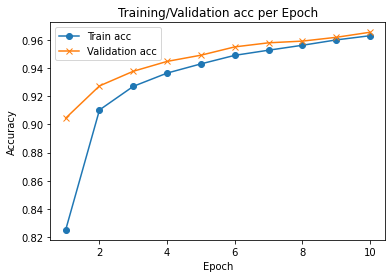

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

Visualisasi Loss

Text(0, 0.5, 'Loss')

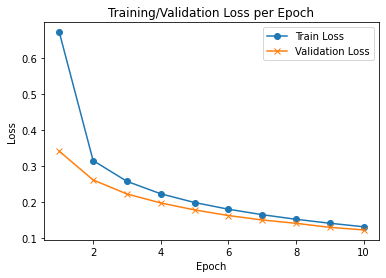

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

Walaupun algoritma LeNet-5 sangat mudah untuk diimplementasikan, namun hasil yang didapatkan sangatlah baik, mencapai accuracy hingga lebih dari 96% dan loss kurang dari 0.13

C. Remove one Full connection layer

Layer FC6 akan dihilangkan

In [ ]:
from keras.models import Sequential
from keras import models, layers
import keras

# Model kosong untuk dipanggil nantinya
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# CNN output perlu dilakukan flattening agar dapat diconnect dengan layer lainnya
model.add(layers.Flatten())

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Compile
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
# # Dataset dapat diload menggunakan fungsi mnist.load_data() dimana data ini sama dengan data yang diberikan di soal.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mengubah tipe data dari uint8 menjadi float32 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalisasi value menjadi kisaran 0 hingga 1 (dari yang awalnya 0-255)
x_train /= 255
x_test /= 255

# Transform label menggunakan one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape dataset menjadi array 4 dimensi
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [ ]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.7240 - accuracy: 0.8115 - val_loss: 0.3589 - val_accuracy: 0.8972
Epoch 2/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.3455 - accuracy: 0.8989 - val_loss: 0.2979 - val_accuracy: 0.9144
Epoch 3/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2981 - accuracy: 0.9133 - val_loss: 0.2607 - val_accuracy: 0.9244
Epoch 4/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2629 - accuracy: 0.9244 - val_loss: 0.2311 - val_accuracy: 0.9342
Epoch 5/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2318 - accuracy: 0.9330 - val_loss: 0.2042 - val_accuracy: 0.9406
Epoch 6/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2041 - accuracy: 0.9407 - val_loss: 0.1771 - val_accuracy: 0.9481
Epoch 7/10
60000/60000 [==============================] - 75s 1ms/st

In [ ]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 5s 543us/step
Test loss 0.1116, accuracy 96.81%


Text(0, 0.5, 'Accuracy')

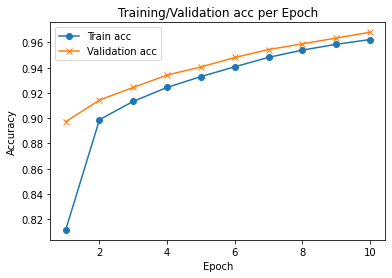

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Loss')

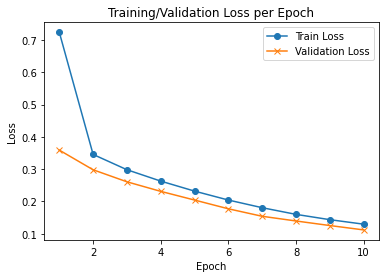

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

Accuracy yang didapatkan sebelum layer FC6 dihilangkan dan sesudah FC6 dihilangkan serupa. FC6 dalam layer ini berperan sebagai hidden layer diantara C5 dan Output layer, yang membuat proses yang terjadi serupa dengan Multi Layer Perceptron. Namun, jika FC6 dihilangkan maka proses yang terjadi diantara C5 dan Output Layer hanya berupa single layer perceptron.

Jika kita menghilangkan layer FC6, tentunya proses akan berjalan dengan lebih cepat, dapat dilhat pada hasil diatas bahwa LeNet-5 berjalan 10 detik lebih cepat pada setiap epochnya.

Namun menghilangkan layer FC6 dapat merusak hasil jika data yang digunakan kompleks. Data yang digunakan pada MNIST dataset berupa tulisan tangan angka, dimana data ini dapat dipisahkan secara linear oleh karena itu menghilangkan layer FC6 pada kasus ini tidak berpengaruh besar. Lain halnya jika data yang digunakan sangat kompleks dan tidak dapat dipisahkan secara linear, jika hal ini terjadi maka menghilangkan layer FC6 akan mengurangi performa dari model yang ada.